<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/simpleLinearRegrssionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os

In [3]:
os.chdir('/content/sample_data')

In [4]:
df = pd.read_csv('california_housing_test.csv')
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0


# **EDA**

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [24]:
df.shape

(3000, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [32]:
df.select_dtypes(include='float').columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [34]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [39]:
# any null values
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [31]:
#create a total rooms per households by dividing the columns
# df['total_bedrooms']/df['households']
df['total_rooms_households'] = df['total_rooms'].div(df['households'].values)
print(df['total_rooms_households'].describe())
df.head(2)

count    3000.000000
mean        5.406560
std         2.277318
min         1.553030
25%         4.421021
50%         5.204142
75%         6.043361
max        62.422222
Name: total_rooms_households, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_households
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264


# **Vizualizations**

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_households
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,6.410891
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,5.451264
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,7.250505
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,6.090909
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,5.236287
...,...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0,2.388797
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0,5.074324
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0,4.345455
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0,6.857143


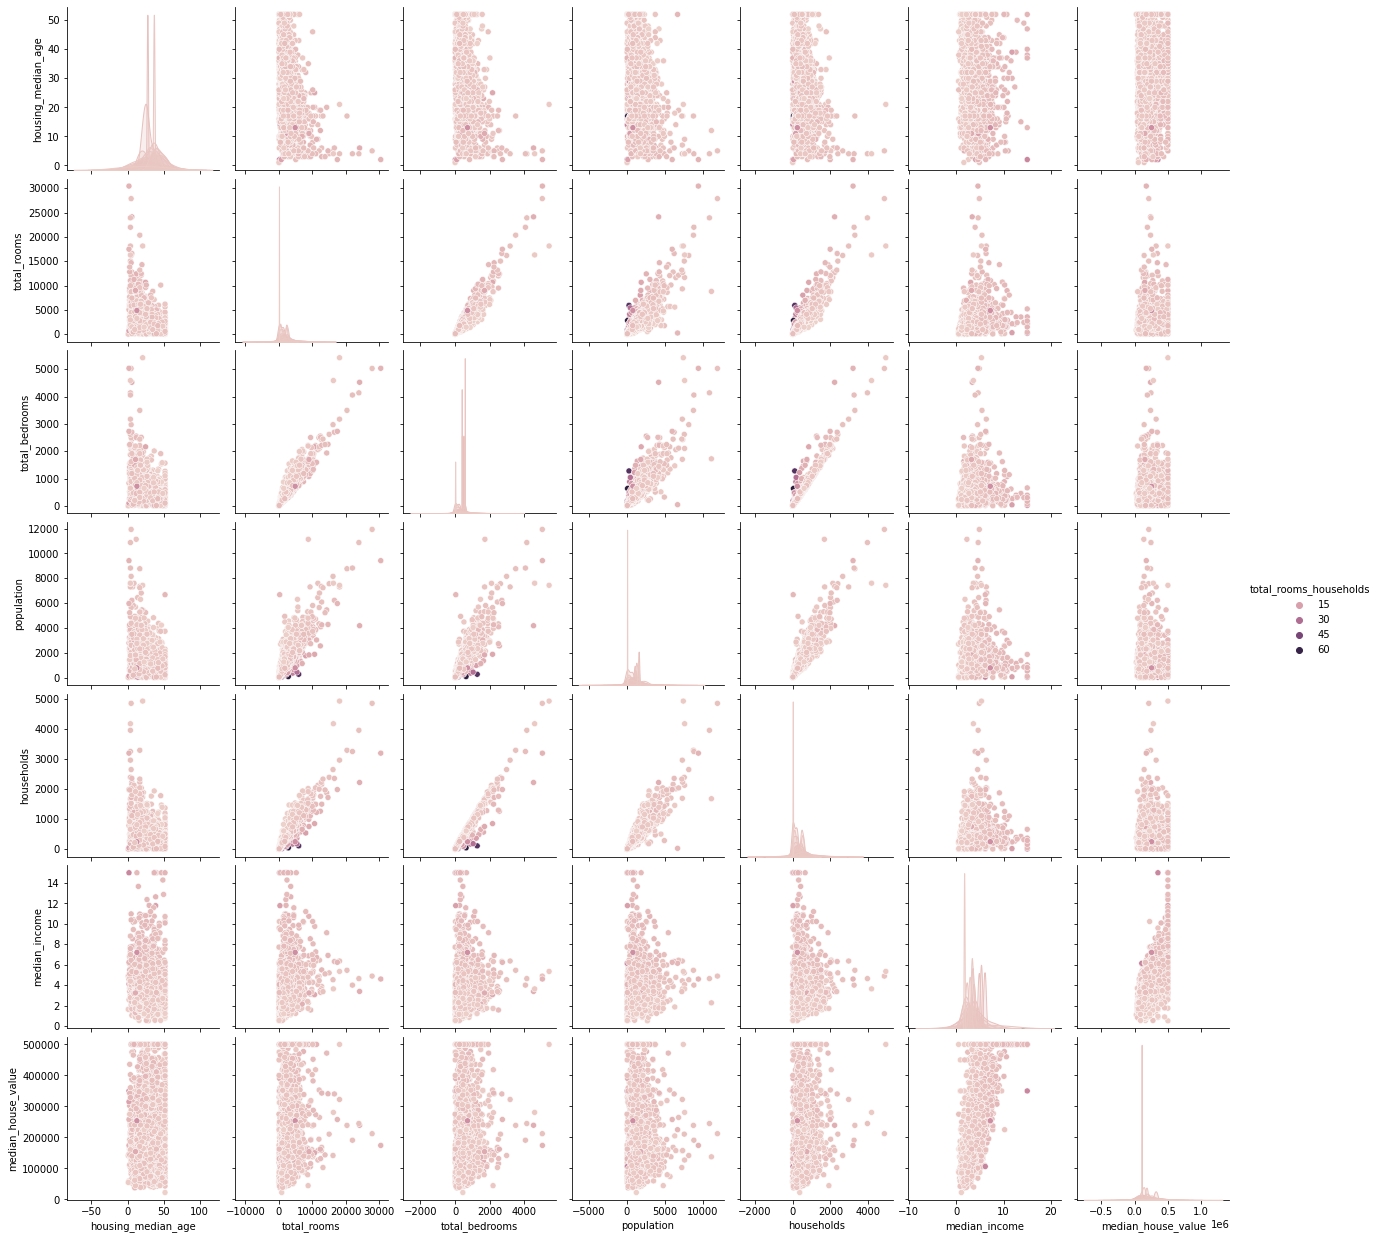

In [34]:
sns.pairplot(df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'total_rooms_households']], hue='total_rooms_households')

# **Predictions**

In [119]:
import numpy as np

In [80]:
X = df.drop(['longitude', 'latitude','median_house_value', 'total_rooms_households'], axis=1)
X.shape

(3000, 6)

In [8]:
Y = df['median_house_value']
Y.shape

(3000,)

In [35]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [85]:
print(X_train.shape)
print(Y_train.shape)
print()
print(X_test.shape)
print(Y_test.shape)

(2400, 6)
(2400,)

(600, 6)
(600,)


In [39]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
#instantiate linear regression
linreg = linear_model.LinearRegression()

In [83]:
#fit the model
linreg.fit(X_train, Y_train)

LinearRegression()

In [86]:
#build the linear regression formula manually, (Like the great Sentdex)
print(f"The coefficients of the linear regression equation are:\n {[round(i,2) for i in linreg.coef_]}")
print(f"\nThe intercept (bias) of the linear regression equation are:\n {round(linreg.intercept_)}")

The coefficients of the linear regression equation are:
 [1911.71, -23.08, 119.38, -37.45, 129.14, 47541.39]

The intercept (bias) of the linear regression equation are:
 -44579


In [91]:
for i in range(10):
  Y [i] = X.housing_median_age[i]*linreg.coef_[0] + X.total_rooms[i]*linreg.coef_[1]+X.total_bedrooms[i]*linreg.coef_[2]+X.population[i]*linreg.coef_[3] + X.households[i]*linreg.coef_[4]+X.median_income[i]*linreg.coef_[5] + linreg.intercept_
  print(Y [i])

331147.7303480866
216355.0158745161
268494.87183408503
300487.86586409766
130654.82308710145
108685.71398773202
125842.20529685676
154704.13624672752
184321.60163942075
117511.62014486716


In [93]:
#predict
y_pred = linreg.predict(X_test)
y_pred[:10]

array([170941.92906235, 233383.34643634, 171398.98136802, 263333.00622805,
       153760.2434773 , 183283.21243536, 319085.53559364, 206585.12259744,
       228332.53274782, 254527.82432135])

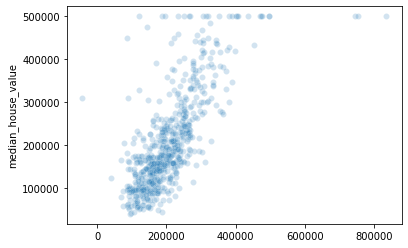

In [99]:
sns.scatterplot(y=Y_test, x=y_pred, alpha=0.2)
plt.show()

In [108]:
print(f"r-squared value is: {r2_score(Y_test, y_pred)}")

r-squared value is: 0.519606445541654


In [140]:
#mse using the sklearn
print(f"The mean sqaured error from sklearn library: {mean_squared_error(Y_test, y_pred)}")

The mean sqaured error from sklearn library: 6209959886.63737


In [126]:
#MSE = square the difference between the actual and the predicted and find the mean (divide by N)
N=len(y_pred)
np.square(Y_test.values[0]-y_pred[0])/(1/N)

612172099334.6228

In [142]:
#using numpy: subtract and sqaure 
# np.square(np.subtract(Y_test.values, y_pred)).mean()
diff = np.subtract(Y_test.values, y_pred)
squared = np.square(np.subtract(Y_test.values, y_pred))
mse = squared.mean()
print(f"The mean sqaured error using numpy: {mse}")
print(f"The mean sqaured error from sklearn library: {mean_squared_error(Y_test, y_pred)}")

The mean sqaured error using numpy: 6209959886.63737
The mean sqaured error from sklearn library: 6209959886.63737
